<a href="https://colab.research.google.com/github/remasotb/project/blob/main/Task2_markit_analysis_association.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt # plotting
import numpy as np
import os
from mlxtend.preprocessing import TransactionEncoder
import kagglehub
import seaborn as sns
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
path = kagglehub.dataset_download("olistbr/brazilian-ecommerce")

print("Path to dataset files:", path)

100%|██████████| 42.6M/42.6M [00:00<00:00, 51.0MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/olistbr/brazilian-ecommerce/versions/2


In [ ]:
dataset_path = '/root/.cache/kagglehub/datasets/olistbr/brazilian-ecommerce/versions/2'

# List files in the dataset directory
files_in_dataset = os.listdir(dataset_path)
files_in_dataset

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['olist_order_reviews_dataset.csv',
 'olist_geolocation_dataset.csv',
 'olist_order_items_dataset.csv',
 'olist_customers_dataset.csv',
 'olist_order_payments_dataset.csv',
 'olist_products_dataset.csv',
 'product_category_name_translation.csv',
 'olist_sellers_dataset.csv',
 'olist_orders_dataset.csv']

In [ ]:
order_items_path = os.path.join(dataset_path, 'olist_order_items_dataset.csv')
orders_path = os.path.join(dataset_path, 'olist_orders_dataset.csv')
products_path = os.path.join(dataset_path, 'olist_products_dataset.csv')

# Load the datasets into pandas DataFrames
order_items_df = pd.read_csv(order_items_path)
orders_df = pd.read_csv(orders_path)
products_df = pd.read_csv(products_path)



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
print(order_items_df.info())
order_items_df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
None


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [ ]:
orders_df.head()
orders_df.info()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
products_df.head()
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
order_baskets = order_items_df.groupby('order_id')['product_id'].apply(list).reset_index()

order_baskets.head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,order_id,product_id
0,00010242fe8c5a6d1ba2dd792cb16214,[4244733e06e7ecb4970a6e2683c13e61]
1,00018f77f2f0320c557190d7a144bdd3,[e5f2d52b802189ee658865ca93d83a8f]
2,000229ec398224ef6ca0657da4fc703e,[c777355d18b72b67abbeef9df44fd0fd]
3,00024acbcdf0a6daa1e931b038114c75,[7634da152a4610f1595efa32f14722fc]
4,00042b26cf59d7ce69dfabb4e55b4fd9,[ac6c3623068f30de03045865e4e10089]


In [ ]:
order_baskets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98666 entries, 0 to 98665
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   order_id    98666 non-null  object
 1   product_id  98666 non-null  object
dtypes: object(2)
memory usage: 1.5+ MB


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-37-48ed4a3d151b>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_product_names, y=top_product_counts, palette='viridis')


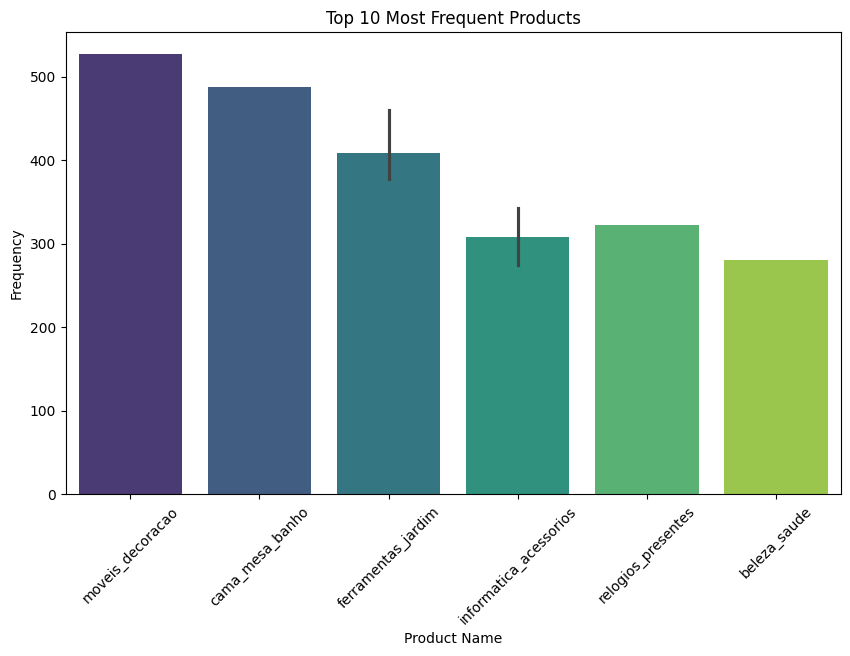

In [ ]:
top_product_ids = order_items_df['product_id'].value_counts().head(10).index
top_product_counts = order_items_df['product_id'].value_counts().head(10).values

top_product_names = products_df[products_df['product_id'].isin(top_product_ids)]
top_product_names = top_product_names.set_index('product_id').loc[top_product_ids]['product_category_name']

# رسم بياني لأكثر 10 منتجات تكرارًا مع أسماء المنتجات
plt.figure(figsize=(10, 6))
sns.barplot(x=top_product_names, y=top_product_counts, palette='viridis')
plt.title('Top 10 Most Frequent Products')
plt.xlabel('Product Name')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-38-88a8db0be3ec>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_categories.index, y=top_categories.values, palette='magma')


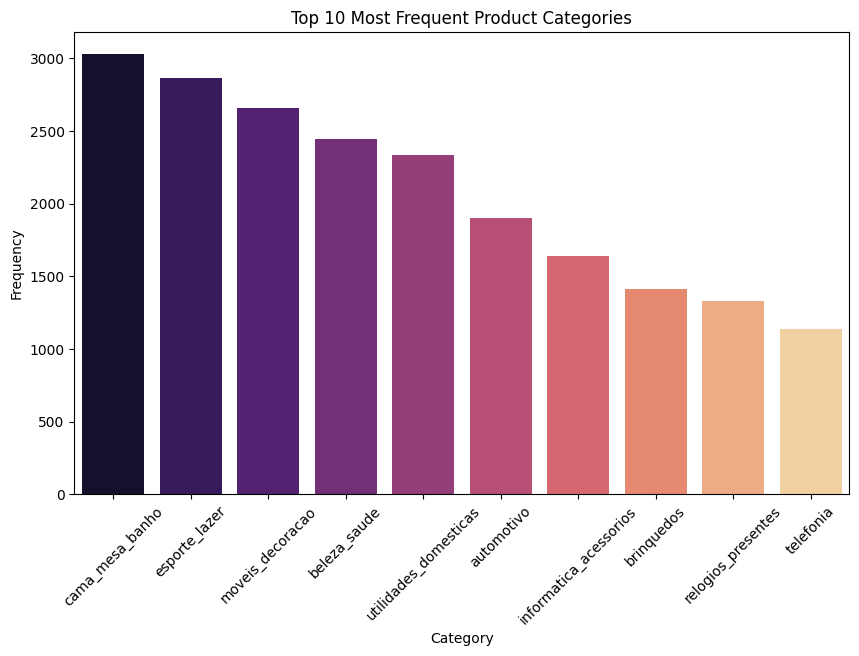

In [ ]:
top_categories = products_df['product_category_name'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_categories.index, y=top_categories.values, palette='magma')
plt.title('Top 10 Most Frequent Product Categories')
plt.xlabel('Category')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

In [ ]:

product_names = products_df.set_index('product_id')['product_category_name'].to_dict()

rows = []
for products in order_baskets['product_id']:
    row = {product_names[product]: 1 for product in products if product in product_names}
    rows.append(row)

df_encoded = pd.DataFrame(rows).fillna(0).astype(int)

df_encoded.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,cool_stuff,pet_shop,moveis_decoracao,perfumaria,ferramentas_jardim,utilidades_domesticas,telefonia,beleza_saude,livros_tecnicos,fashion_bolsas_e_acessorios,...,cds_dvds_musicais,artes_e_artesanato,moveis_colchao_e_estofado,tablets_impressao_imagem,construcao_ferramentas_ferramentas,fashion_esporte,la_cuisine,pc_gamer,seguros_e_servicos,fashion_roupa_infanto_juvenil
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_encoded.dropna(axis=1, how='all', inplace=True)
df_encoded.dropna(axis=0, how='all', inplace=True)

df_encoded.head()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,cool_stuff,pet_shop,moveis_decoracao,perfumaria,ferramentas_jardim,utilidades_domesticas,telefonia,beleza_saude,livros_tecnicos,fashion_bolsas_e_acessorios,...,cds_dvds_musicais,artes_e_artesanato,moveis_colchao_e_estofado,tablets_impressao_imagem,construcao_ferramentas_ferramentas,fashion_esporte,la_cuisine,pc_gamer,seguros_e_servicos,fashion_roupa_infanto_juvenil
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
frequent_itemsets = apriori(df_encoded, min_support=0.001, use_colnames=True)
print(frequent_itemsets.head())


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


    support              itemsets
0  0.036811          (cool_stuff)
1  0.017331            (pet_shop)
2  0.065362    (moveis_decoracao)
3  0.032048          (perfumaria)
4  0.035656  (ferramentas_jardim)


In [ ]:
print(df_encoded.sum().sort_values(ascending=False).head(10))


cama_mesa_banho           9417
beleza_saude              8836
esporte_lazer             7720
informatica_acessorios    6689
moveis_decoracao          6449
utilidades_domesticas     5884
relogios_presentes        5624
telefonia                 4199
automotivo                3897
brinquedos                3886
dtype: int64


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-39-7cfde12f8783>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_product_names, y=top_product_counts, palette='coolwarm', ax=ax)


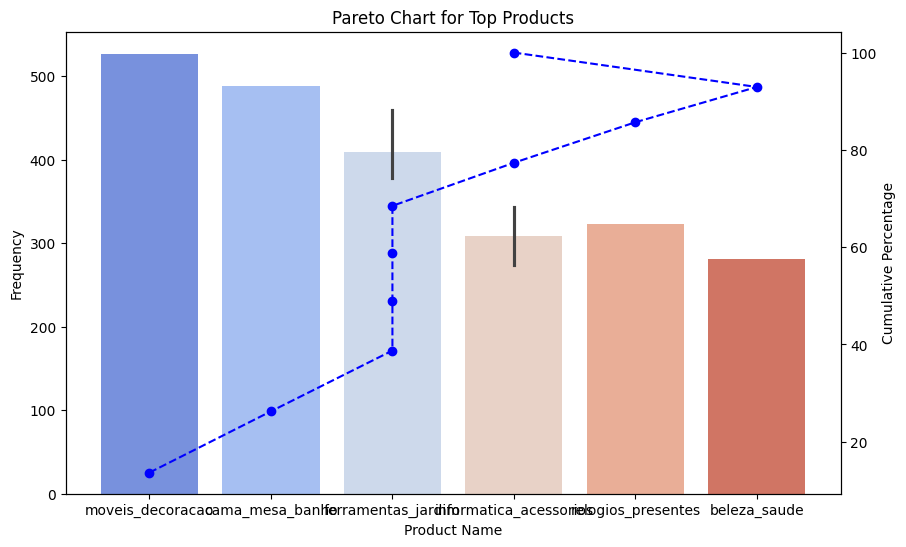

In [ ]:
cumulative_frequency = (top_product_counts.cumsum() / top_product_counts.sum()) * 100
fig, ax = plt.subplots(figsize=(10, 6))
sns.barplot(x=top_product_names, y=top_product_counts, palette='coolwarm', ax=ax)
ax2 = ax.twinx()
ax2.plot(top_product_names, cumulative_frequency, color='blue', marker='o', linestyle='--')
ax.set_title('Pareto Chart for Top Products')
ax.set_xlabel('Product Name')
ax.set_ylabel('Frequency')
ax2.set_ylabel('Cumulative Percentage')
plt.xticks(rotation=45)
plt.show()

In [ ]:
frequent_itemsets = apriori(df_encoded, min_support=0.0005, use_colnames=True)

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=0.1)
rules = rules[rules['confidence'] >= 0.05]

print(rules[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


Empty DataFrame
Columns: [antecedents, consequents, support, confidence, lift]
Index: []


In [ ]:
from mlxtend.frequent_patterns import fpgrowth

frequent_itemsets_fp = fpgrowth(df_encoded, min_support=0.0005, use_colnames=True)

print(frequent_itemsets_fp.head())

rules_fp = association_rules(frequent_itemsets_fp, metric="confidence", min_threshold=0.2)

print(rules_fp[['antecedents', 'consequents', 'support', 'confidence', 'lift']].head(10))


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/mlxtend/frequent_patterns/fpcommon.py:109: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


    support              itemsets
0  0.036811          (cool_stuff)
1  0.017331            (pet_shop)
2  0.065362    (moveis_decoracao)
3  0.032048          (perfumaria)
4  0.035656  (ferramentas_jardim)
Empty DataFrame
Columns: [antecedents, consequents, support, confidence, lift]
Index: []
